Saving 3. Predict Disease Outcome Based on Genetic and Clinical Data.csv to 3. Predict Disease Outcome Based on Genetic and Clinical Data (10).csv

📄 First 5 Rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


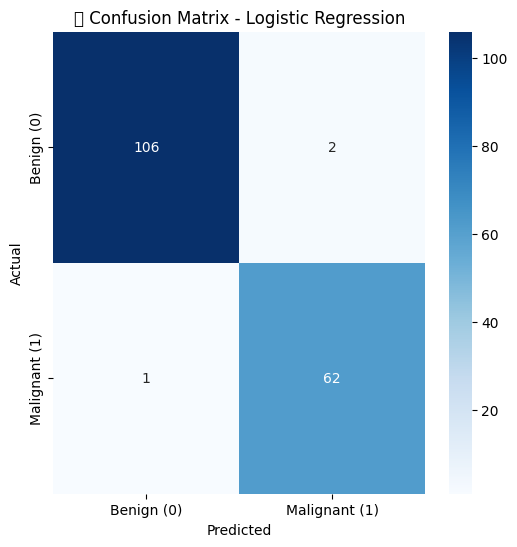

In [16]:
# 📦 Required libraries
import pandas as pd                       # For data manipulation
import numpy as np                        # For numerical operations
from sklearn.model_selection import train_test_split  # To split data into training and testing
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For scaling and encoding
from sklearn.linear_model import LogisticRegression             # Logistic Regression model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Evaluation metrics
import matplotlib.pyplot as plt          # For data visualization
import seaborn as sns                    # For enhanced plots
import io                                # To handle file uploads in binary

# 📁 Upload the dataset (for Google Colab)
from google.colab import files
uploaded = files.upload()  # Opens upload dialog
filename = next(iter(uploaded))  # Gets the first uploaded filename
data = pd.read_csv(io.BytesIO(uploaded[filename]))  # Reads the CSV file into a DataFrame

# 📊 Basic data exploration
print("\n📄 First 5 Rows:")
print(data.head())  # Display first 5 rows of dataset

print("\n🔍 Data Info:")
print(data.info())  # Print data types and null value info

print("\n📊 Class Distribution:")
print(data['diagnosis'].value_counts())  # Check how many malignant (M) and benign (B) cases

# 🧠 Encode target variable
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])  # Converts M→1, B→0

# 🧹 Drop unnecessary columns
data.drop(['id'], axis=1, inplace=True, errors='ignore')  # Drop 'id' column if exists
data.dropna(axis=1, inplace=True)  # Drop any columns with NaN values (e.g., unnamed)

# 🔍 Check for any missing values after cleanup
print("\n🧼 Missing Values:")
print(data.isnull().sum())  # Should ideally return all zeros

# 🎯 Split into features and labels
X = data.drop('diagnosis', axis=1)  # Features
y = data['diagnosis']               # Target

# 🧪 Split data for training and testing (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 📏 Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)        # Transform test data using same scaler

# 🤖 Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)

# 🧪 Train the model
model.fit(X_train, y_train)            # Train model

# 🧪 Make predictions
y_pred = model.predict(X_test)         # Predict on test data

# 📊 Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Display results
print("\n🔎 Logistic Regression Results:")
print(f"✅ Accuracy: {accuracy:.4f}")
print("📋 Classification Report:")
print(report)
print("🧮 Confusion Matrix:")
print(cm)

# 🧾 Confusion matrix heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title('🧾 Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
